In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
df = pd.read_csv('../data/processed.csv.gz', compression='gzip')

# Split Data
train_df = df[df['Year'] < 2020]
test_df = df[df['Year'] >= 2020]

X_train = train_df.drop(columns=['AveragePrice'])
y_train = train_df['AveragePrice']
X_test = test_df.drop(columns=['AveragePrice'])
y_test = test_df['AveragePrice']

In [11]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    return {
        "Train R2": r2_score(y_train, y_train_pred),
        "Test R2": r2_score(y_test, y_test_pred),
        "Train RMSE": np.sqrt(mean_squared_error(y_train, y_train_pred)),
        "Test RMSE": np.sqrt(mean_squared_error(y_test, y_test_pred)),
        "Train MAE": mean_absolute_error(y_train, y_train_pred),
        "Test MAE": mean_absolute_error(y_test, y_test_pred),
        "Train Predictions": y_train_pred,
        "Test Predictions": y_test_pred}

In [12]:
model_names = ['linear', 'ridge', 'lasso', 'random_forest']
results = {}

for name in model_names:
    model_path = f'../models/{name}_model.pkl'
    print(f'Loading {name} model...')
    model = joblib.load(model_path)
    results[name] = evaluate_model(model, X_train, y_train, X_test, y_test)

Loading linear model...
Loading ridge model...
Loading lasso model...
Loading random_forest model...


In [13]:
metrics_df = pd.DataFrame({
    model: {
        "Train R2": res["Train R2"],
        "Test R2": res["Test R2"],
        "Train RMSE": res["Train RMSE"],
        "Test RMSE": res["Test RMSE"],
        "Train MAE": res["Train MAE"],
        "Test MAE": res["Test MAE"]}
    for model, res in results.items()}).T.round(2)

display(metrics_df.style.background_gradient(cmap="Blues"))

,Train R2,Test R2,Train RMSE,Test RMSE,Train MAE,Test MAE
linear,0.980000,0.960000,15530.330000,27751.870000,10714.730000,20659.180000
ridge,0.980000,0.960000,15530.560000,27501.140000,10721.150000,20573.690000
lasso,0.980000,0.960000,15860.260000,27057.500000,11136.260000,21073.580000
random_forest,1.000000,0.990000,302.360000,12277.010000,111.990000,5006.200000


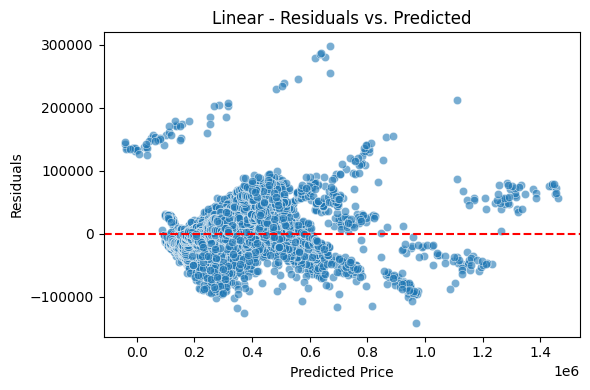

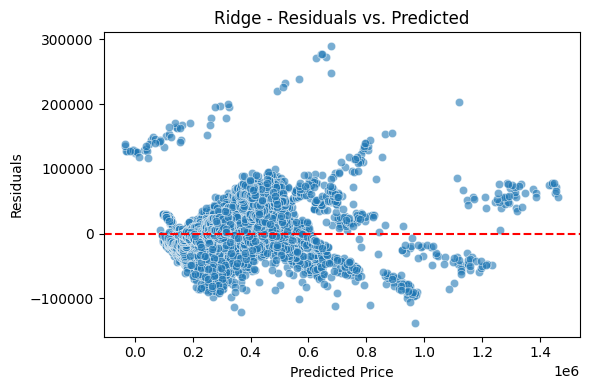

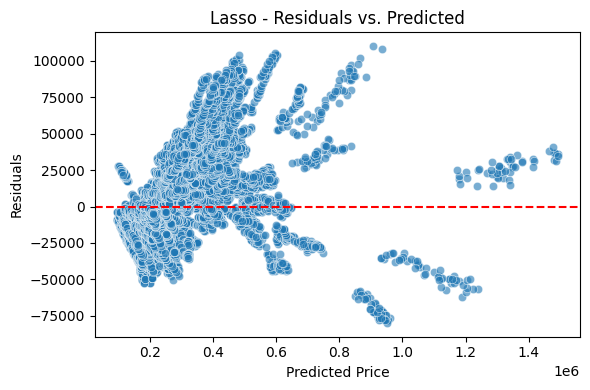

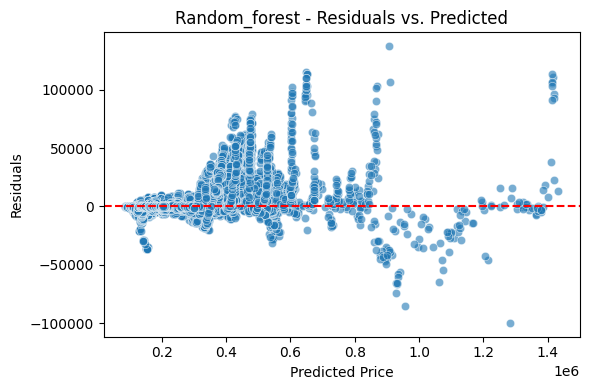

In [14]:
for name in model_names:
    residuals = y_test - results[name]["Test Predictions"]
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=results[name]["Test Predictions"], y=residuals,  alpha=0.6)
    plt.axhline(0, color='r', linestyle='--')
    plt.title(f"{name.capitalize()} - Residuals vs. Predicted")
    plt.xlabel("Predicted Price")
    plt.ylabel("Residuals")
    plt.tight_layout()
    plt.show()

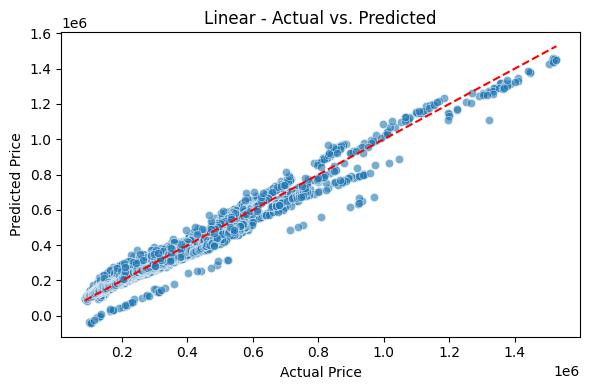

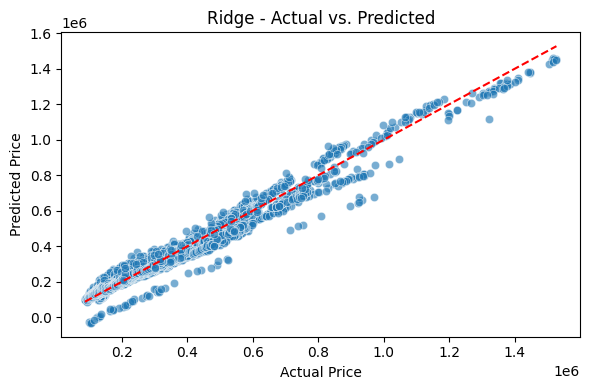

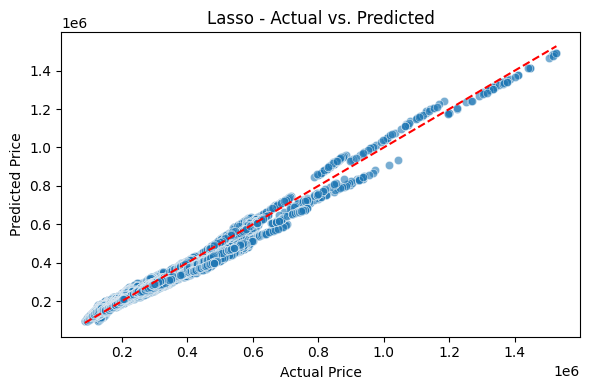

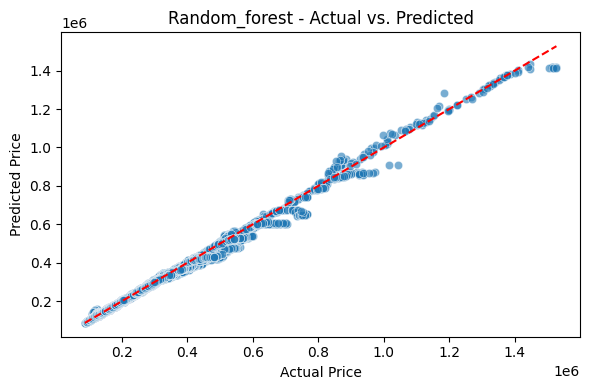

In [16]:
for name in model_names:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(
        x=y_test,
        y=results[name]["Test Predictions"],
        alpha=0.6
    )
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'{name.capitalize()} - Actual vs. Predicted')
    plt.xlabel("Actual Price")
    plt.ylabel("Predicted Price")
    plt.tight_layout()
    plt.show()